In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dados/ab_data.csv')

In [4]:
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [71]:
dfteste = df.groupby(by ='group').agg({'mean', 'std'})['converted']

In [72]:
dfteste

,std,mean
group,,
control,0.325429,0.120399
treatment,0.323695,0.118920


In [35]:
controle = df[df['group'].isin(['control'])]
controle = controle.sample(5000)

In [34]:
tratamento = df[df['group'].isin(['treatment'])]
tratamento = tratamento.sample(5000)

In [36]:
dfab = pd.concat((controle,tratamento), axis = 0)

In [37]:
dfab

,user_id,timestamp,group,landing_page,converted
232923,667621,2017-01-11 14:26:49.292396,control,old_page,0
24441,727125,2017-01-08 07:38:06.340440,control,old_page,0
245305,647882,2017-01-07 08:53:25.389313,control,old_page,0
277967,703624,2017-01-11 05:36:55.100554,control,old_page,0
157254,868921,2017-01-07 23:25:42.559657,control,old_page,1
...,...,...,...,...,...
103318,665888,2017-01-23 06:14:04.985344,treatment,new_page,0
90162,695660,2017-01-12 15:13:33.422516,treatment,new_page,0
96656,673961,2017-01-20 12:40:29.679750,treatment,new_page,0
162104,693431,2017-01-22 07:41:01.139341,treatment,new_page,0


In [73]:
dfab.groupby(by ='group').agg({'mean', 'std'})['converted']

,std,mean
group,,
control,0.338307,0.1318
treatment,0.329615,0.1240


Aparentemente, a média de conversão do grupo controle é maior. No entanto, o desvio padrão de ambos os grupos incluem ambos os grupos numa mesma estatística.

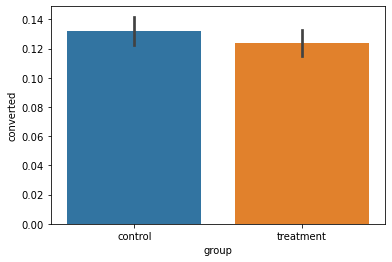

In [46]:
ax= sns.barplot(x = 'group',y ='converted',data = dfab, orient = 'v')

Os valores de conversão do grupo controle é maior que o valor de conversão do grupo tratamento. Agora irei realizar um teste A/B para de fato confirmar a diferença ou igualdade dos dados
## Realizando teste A/B com scipy
#### Ho - Hipotese nula: Não há diferença alguma entre os dados
#### H1 - Hipótese alternativa: Há diferença entre os dados
Para abandonar a hipótese nula o valor do p-value deve ser menor de 5%

In [49]:
from scipy.stats import ttest_ind as ttest
import numpy as np

In [69]:
a = np.array(tratamento['converted'])
b = np.array(controle['converted'])

In [70]:
t, p = ttest(a, b)
print(f'O valor p é de {round(p*100,2)}%')

O valor p é de 24.3%


O valor de p sendo 24% significa que ambos os dados são semelhantes, e os dados extremos não são de improváveis de ocorrer. Isto significa que a hipótese nula não pode ser descartadas